(379, 13) (379,)
loss = 284.828985
loss = 101.086790
loss = 51.439418
loss = 37.296953
loss = 32.658630
loss = 30.640970
loss = 29.403036
loss = 28.439378
loss = 27.602029
loss = 26.841352
loss = 26.136572
loss = 25.476612
loss = 24.854422
loss = 24.265052
loss = 23.704843
loss = 23.170996
loss = 22.661312
loss = 22.174017
loss = 21.707645
loss = 21.260954
loss = 20.832866
loss = 20.422427
loss = 20.028779
loss = 19.651139
loss = 19.288784
loss = 18.941037
loss = 18.607267
loss = 18.286876
loss = 17.979297
loss = 17.683993
loss = 17.400452
loss = 17.128184
loss = 16.866723
loss = 16.615624
loss = 16.374458
loss = 16.142817
loss = 15.920311
loss = 15.706565
loss = 15.501220
loss = 15.303932
loss = 15.114372
loss = 14.932225
loss = 14.757187
loss = 14.588970
loss = 14.427295
loss = 14.271897
loss = 14.122519
loss = 13.978918
loss = 13.840860
loss = 13.708119
loss = 13.580479
loss = 13.457736
loss = 13.339690
loss = 13.226152
loss = 13.116940
loss = 13.011880
loss = 12.910804
loss = 12.81

loss = 9.855353
loss = 9.855171
loss = 9.854990
loss = 265.634378
loss = 111.910005
loss = 67.718024
loss = 54.302957
loss = 49.569228
loss = 47.314927
loss = 45.796986
loss = 44.523608
loss = 43.354414
loss = 42.247931
loss = 41.190687
loss = 40.177259
loss = 39.204640
loss = 38.270626
loss = 37.373341
loss = 36.511091
loss = 35.682304
loss = 34.885509
loss = 34.119323
loss = 33.382436
loss = 32.673610
loss = 31.991669
loss = 31.335495
loss = 30.704023
loss = 30.096240
loss = 29.511179
loss = 28.947918
loss = 28.405578
loss = 27.883316
loss = 27.380331
loss = 26.895854
loss = 26.429151
loss = 25.979521
loss = 25.546291
loss = 25.128819
loss = 24.726489
loss = 24.338712
loss = 23.964924
loss = 23.604584
loss = 23.257175
loss = 22.922200
loss = 22.599183
loss = 22.287667
loss = 21.987216
loss = 21.697410
loss = 21.417847
loss = 21.148139
loss = 20.887918
loss = 20.636826
loss = 20.394522
loss = 20.160679
loss = 19.934981
loss = 19.717127
loss = 19.506826
loss = 19.303799
loss = 19.10777

loss = 12.780433
loss = 12.779903
loss = 12.779375
loss = 12.778850
loss = 12.778327
loss = 12.777806
loss = 12.777289
loss = 12.776773
loss = 12.776261
loss = 12.775750
loss = 12.775242
loss = 12.774737


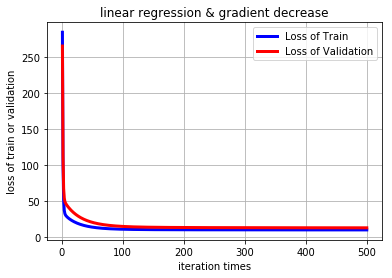

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

def loadDataSet():
	# 读取数据
	X,y=load_svmlight_file("housing_scale.txt")
	#将稀疏矩阵转化为完整特征矩阵
	X.todense()
	# 将数据集切分为训练集和验证集
	X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=0)
	print(X_train.shape,y_train.shape)
	return X_train, X_validation, y_train, y_validation

def gradDescent(alpha,maxCycles,X_data,y_data):
	num = y_data.shape[0]    #样本数量
	# 线性模型参数正态分布初始化
	w = np.random.normal(size=(X_data.shape[1]))
	b = np.random.normal(size=1)
	losss = []

	#迭代次maxCycles次
	for n in range(maxCycles):
		grad_w = np.zeros(X_data.shape[1])
		grad_b = np.zeros(1)
		loss = 0
		for i in range(num):
			y = np.dot( X_data[i].data, w ) + b
			loss += np.power((y - y_data[i]),2) / ( 2 * num)
			grad_w += ( y - y_data[i] ) * X_data[i].data / num
			grad_b += ( y - y_data[i] ) / num
		#更新模型参数
		w -= alpha * grad_w 
		b -= alpha * grad_b
		losss.append(loss)
		print("loss = %f" % loss)
	return losss

def plotLossPerTime(n,losss_train,losss_validation):
	plt.xlabel('iteration times')
	plt.ylabel('loss of train or validation')
	plt.title('linear regression & gradient decrease')
	n_cycles = range(1,n+1)
	plt.plot(n_cycles, losss_train, label = "Loss of Train", color='blue', linewidth=3)
	plt.plot(n_cycles, losss_validation, label = "Loss of Validation", color='red', linewidth=3)
	plt.legend(loc=0)
	plt.grid()
	plt.show()

# main
X_train, X_validation, y_train, y_validation = loadDataSet()
alpha = 0.1
maxCycles = 500
losss_train = gradDescent(alpha,maxCycles,X_train,y_train)
losss_validation = gradDescent(alpha,maxCycles,X_validation,y_validation)
plotLossPerTime(maxCycles,losss_train,losss_validation)